In [2]:
!pip install fasttext

In [3]:
import os
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import fasttext
import time
import tqdm
import jpype
import ast

In [4]:
# 전처리, 명사추출, 키워드추출, 불용어후처리까지 마친 데이터
folder_path = '/Users/jaesolshin/Documents/GitHub/youtube_dashboard'
file_path = os.path.join(folder_path, 'keyword_list_after_cleaning.csv')
keyword_list = pd.read_csv(file_path)
test_list = keyword_list.loc[:10,'keyword'].to_list()

# fastText

In [5]:
# fast test pretrained model 로딩
ko_model_path = '/Users/jaesolshin/Library/CloudStorage/GoogleDrive-ysys143@gmail.com/내 드라이브/2024-2/Google ML Bootcamp2024/data/cc.ko.300.bin'
ko_model = fasttext.load_model(ko_model_path)

In [6]:
ko_model.get_word_vector("파이썬")

array([-1.48815408e-01, -1.17857963e-01, -8.72064084e-02,  4.93978858e-02,
        1.41432300e-01,  9.49753374e-02, -6.93019107e-02,  4.18673828e-03,
        4.86976393e-02,  1.31665289e-01, -2.02226058e-01, -8.66764039e-03,
       -3.45623493e-02,  1.50093883e-01,  8.98581743e-03,  5.87398894e-02,
        4.53059897e-02, -1.22770073e-03,  1.71326362e-02,  7.44685829e-02,
       -2.12160572e-02,  1.21598467e-02, -9.41937342e-02,  4.67983186e-02,
       -3.94061618e-02,  4.12501395e-01, -1.31122023e-03, -7.47695118e-02,
       -9.48062688e-02,  5.56808524e-03,  2.16821611e-01,  1.62936836e-01,
       -3.33731323e-02, -4.80934307e-02,  1.00398630e-01, -1.33311562e-02,
       -1.12874627e-01,  3.91419381e-02, -1.01466537e-01, -1.82012357e-02,
       -1.20168112e-01, -8.55559409e-02, -5.27738035e-02, -3.33135948e-02,
       -2.87191439e-02,  3.46537381e-02,  3.86811346e-02,  2.23775730e-02,
       -2.91406643e-02, -7.43493065e-03,  1.04075342e-01, -1.43336579e-01,
        9.10009518e-02, -

In [7]:
dir(fasttext)

['BOW',
 'EOS',
 'EOW',
 'FastText',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'cbow',
 'division',
 'load_model',
 'print_function',
 'skipgram',
 'supervised',
 'tokenize',
 'train_supervised',
 'train_unsupervised',
 'unicode_literals']

In [8]:
for w, sim in ko_model.get_nearest_neighbors('파이썬', 10):
    print(f'{w}: {sim}')

0.5650618672370911: Python
0.5624368786811829: 자이썬
0.5598084330558777: 레일스
0.5595799684524536: 파이썬을
0.528820276260376: 언어용
0.5250025987625122: 파이썬의
0.5225091576576233: 프로그래밍
0.5222089290618896: wxPython
0.5201173424720764: 파이썬이나
0.5187377333641052: 함수형


# with test_list

In [9]:
test_list

['노래', '뮤비', '사랑해', '컨셉', '멤버', '응원', '화이팅', '한국', '가사', '데뷔', '아이돌']

/Users/jaesolshin/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/jaesolshin/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


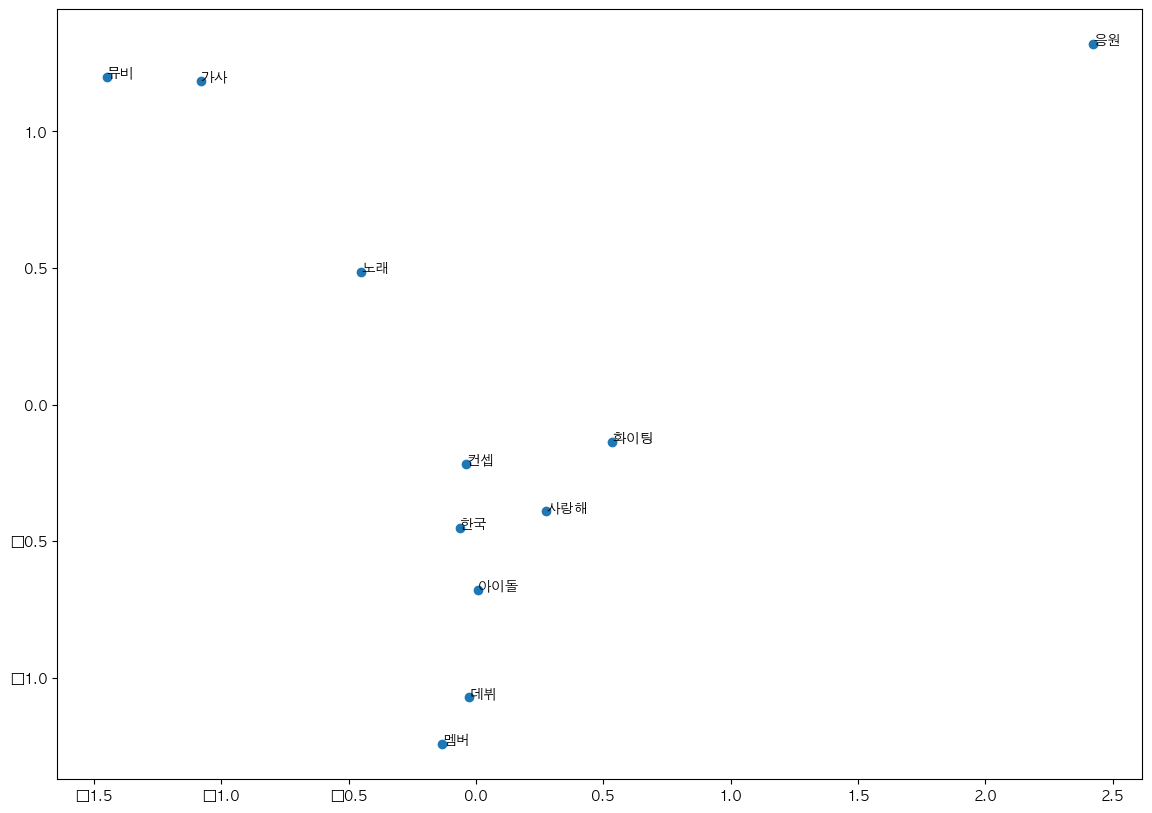

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.decomposition import PCA

# 한글 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 폰트 파일 경로
font_prop = fm.FontProperties(fname=font_path, size=12)

# 전역 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 전체 상위단어 10
test_list = keyword_list.loc[:10,'keyword'].to_list()

# 2차원 공간 상에 그리기
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.get_word_vector(w) for w in test_list])
xs = xys[:,0]
ys = xys[:,1]
plt.figure(figsize=(14, 10))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(test_list):
    plt.annotate(v, xy=(xs[i], ys[i]))

/Users/jaesolshin/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/jaesolshin/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


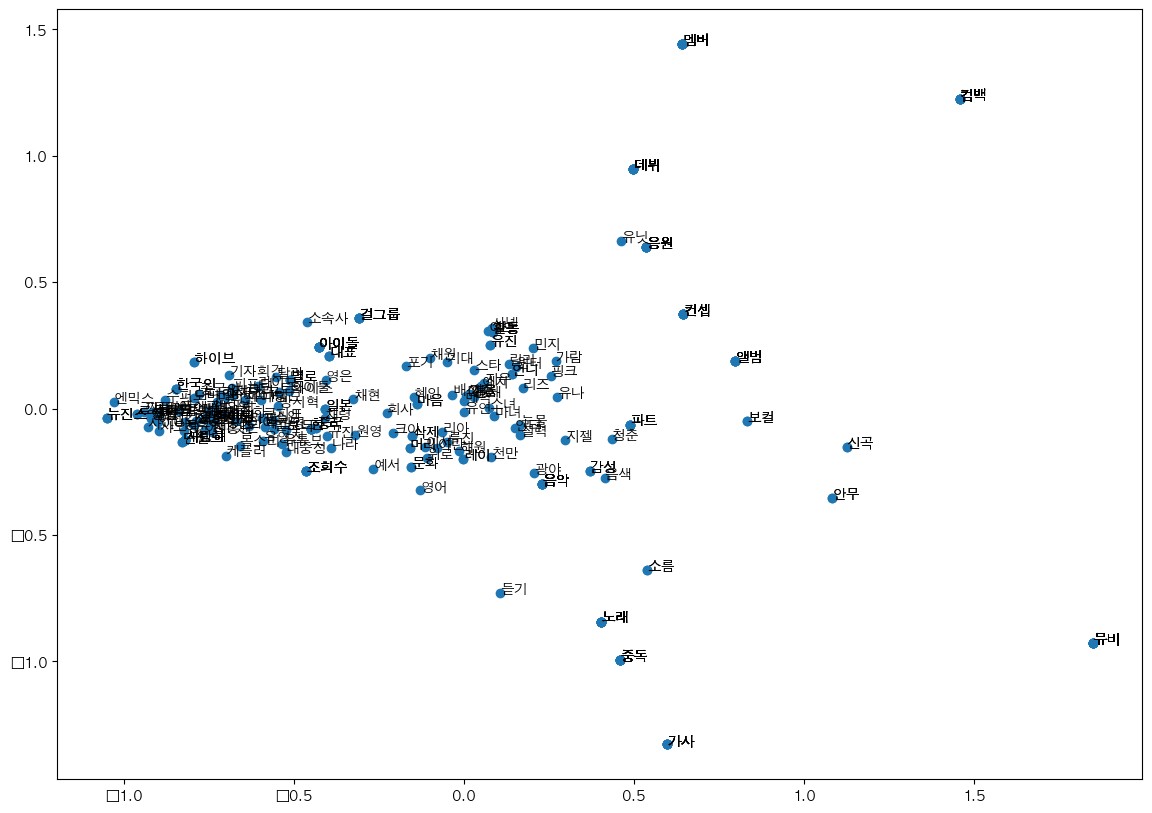

In [11]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# 전체 상위단어 300
test_list = keyword_list.loc[:300,'keyword'].to_list()

# matplotplib 폰트 설정을 안해서 그래프에서 한국어 라벨이 깨져서 아래 단어로 임시처리했습니다. ㅠ
word_labels = [
    'song',
    'MV',
    'love',
    'concept',
    'support', 
    'fighting', 
    'Korea',
    'lyrics',
    'debut',
    'idol'
]

pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.get_word_vector(w) for w in test_list])
xs = xys[:,0]
ys = xys[:,1]
plt.figure(figsize=(14, 10))
plt.scatter(xs, ys, marker='o')

for i, v in enumerate(test_list):
    plt.annotate(v, xy=(xs[i], ys[i]))

# fasttetxt unsupervised learning

In [12]:
# 전처리, 명사추출, 키워드추출, 불용어후처리까지 마친 데이터
folder_path = '/Users/jaesolshin/Documents/GitHub/youtube_dashboard'
file_path = os.path.join(folder_path, 'KPOP_comments_merged_preprocessed_after_kw_cleaning.csv')
comments_df = pd.read_csv(file_path)

In [13]:
textfile_path = os.path.join(folder_path, 'comments.txt')
with open(textfile_path, 'w') as f:
    for line in comments_df['comment'].values:
        f.write(line)
        f.write('\n')

In [14]:
sg_model = fasttext.train_unsupervised(input=textfile_path, model='skipgram', loss='hs')
cbow_model = fasttext.train_unsupervised(input=textfile_path, model='cbow')

Read 7M words
Number of words:  101409
Number of labels: 0
Progress: 100.0% words/sec/thread:   89422 lr:  0.000000 avg.loss:  8.664225 ETA:   0h 0m 0s
Read 7M words
Number of words:  101409
Number of labels: 0
Progress: 100.0% words/sec/thread:  392588 lr:  0.000000 avg.loss:  1.650090 ETA:   0h 0m 0s


In [15]:
sg_model.get_word_vector('뉴진스')

array([-0.09316168, -0.20338121,  0.0317107 , -0.06643895,  0.09933193,
       -0.11425489, -0.26046872, -0.2696476 , -0.07793468,  0.07379815,
        0.40308216, -0.23073614, -0.04801054,  0.05314843,  0.06065001,
       -0.2907858 ,  0.02566119, -0.23818357,  0.02697172, -0.15765338,
        0.0742959 , -0.06667596, -0.07841056,  0.09872098, -0.15106018,
       -0.01672331, -0.18052374, -0.2593977 , -0.06767444,  0.10695546,
       -0.29694062,  0.03682225,  0.12290651, -0.17176272, -0.27829584,
       -0.06084001, -0.02159217, -0.07572403, -0.2359723 , -0.1030745 ,
        0.1368588 ,  0.32695046, -0.12156698, -0.18770666, -0.2804448 ,
       -0.03923335,  0.2984787 ,  0.20369817,  0.1871545 , -0.03576522,
        0.22638096,  0.47746018, -0.292612  , -0.06412409, -0.2351658 ,
       -0.0488302 ,  0.12004865,  0.09719203, -0.11513748, -0.32599342,
        0.1455335 , -0.01801722,  0.259829  , -0.05444944, -0.25602978,
        0.06850356, -0.06018525,  0.20921296, -0.01081985, -0.23

In [16]:
import numpy as np

def get_nn_words(question, model, words, vectors, k=1):
    question = question.lower().strip()
    if question not in words:
        print(question, ' not in vocabulary')
        return
    query = model.get_word_vector(question)
    query = query / np.linalg.norm(query)
    seen_words = [question]
    for _ in range(k):
        ban_set = [words.index(w) for w in seen_words if w in words]
        similarities = np.dot(vectors, query)
        for idx in ban_set:
            similarities[idx] = -1  # 제외할 단어들은 유사도를 낮게 설정
        nn_idx = np.argmax(similarities)
        nn = words[nn_idx]
        seen_words.append(nn)
        yield nn


def nn(model, question_words, k, threshold=100000):
    # Gets words with associated frequency sorted by default by descending order
    words, freq = model.get_words(include_freq=True)
    words = words[:threshold]
    vectors = np.zeros((len(words), model.get_dimension()), dtype=float)
    for i in range(len(words)):
        wv = model.get_word_vector(words[i])
        wv = wv / np.linalg.norm(wv)
        vectors[i] = wv

    if isinstance(question_words, str):
        questions = question_words.split(',')
    elif isinstance(question_words, list):
        questions = question_words
    else:
        raise ValueError('please give question_words as a comma separated string or list')
    
    for question in questions:
        print(f'words similar to {question}:')
        for w in get_nn_words(question, model, words, vectors, k):
            print(w)
        print('#########################################')

In [17]:
nn(sg_model, ["하이브", "엔믹스", "뉴진스"], k=5)

words similar to 하이브:
미친하이브
해명하이브
단월드하이브
하이브하이브
하이브야
#########################################
words similar to 엔믹스:
스테이시
이번에도
흥하자
엔믹스가
짱스파
#########################################
words similar to 뉴진스:
뉴진스힘내
대퓨님
뉴진스맘
미니진
뉴진스와
#########################################


In [18]:
def similarity(v1, v2):
    n1 = np.linalg.norm(v1)
    n2 = np.linalg.norm(v2)
    return np.dot(v1, v2) / n1 / n2

v1 = sg_model.get_word_vector('민희진')
v2 = sg_model.get_word_vector('뉴진스')
print(similarity(v1, v2))

v1 = cbow_model.get_word_vector('민희진')
v2 = cbow_model.get_word_vector('뉴진스')
print(similarity(v1, v2))

0.6034029
0.29502615


/Users/jaesolshin/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


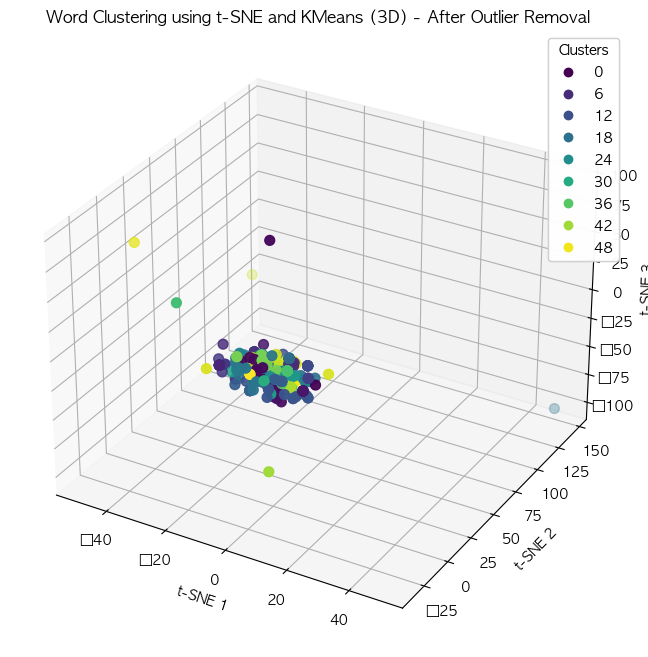

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# 한글 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 폰트 파일 경로
font_prop = fm.FontProperties(fname=font_path, size=12)

# 전역 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 전체 상위단어 300
word_list = keyword_list.loc[:300,'keyword'].to_list()

# model은 FastText, Word2Vec 등 사전 학습된 모델로 가정
embeddings = np.array([sg_model.get_word_vector(word) for word in test_list])

# KMeans 군집화 수행
num_clusters = 50  # 군집의 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)  # 각 단어에 대한 클러스터 할당

# 각 클러스터의 중심과 각 점 사이의 거리를 계산하여 이상치 제거
distances = np.linalg.norm(embeddings - kmeans.cluster_centers_[clusters], axis=1)
threshold = np.percentile(distances, 95)  # 거리 상위 5%를 이상치로 간주
filtered_indices = distances < threshold  # 이상치가 아닌 데이터의 인덱스

# 필터링된 데이터로 다시 t-SNE 수행
filtered_embeddings = embeddings[filtered_indices]
filtered_clusters = clusters[filtered_indices]

tsne = TSNE(n_components=3, random_state=42, perplexity=5, n_iter=300)
reduced_data_tsne = tsne.fit_transform(filtered_embeddings)

# 3D 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터에 따라 다른 색상으로 시각화
scatter = ax.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], reduced_data_tsne[:, 2],
                     c=filtered_clusters, cmap='viridis', s=50)

# 컬러바 추가 (클러스터를 색상으로 표시)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# 축과 타이틀 설정
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.title('Word Clustering using t-SNE and KMeans (3D) - After Outlier Removal')

plt.show()


In [21]:
# 각 군집에 속한 단어 확인
clustered_words = {}

# 각 단어에 대해 속한 클러스터 번호를 기반으로 단어를 그룹화
for i, cluster_id in enumerate(filtered_clusters):
    if cluster_id not in clustered_words:
        clustered_words[cluster_id] = []
    clustered_words[cluster_id].append(word_list[i])

# 각 클러스터에 속한 단어 출력
for cluster_id, words in clustered_words.items():
    print(f"Cluster {cluster_id}: {', '.join(words)}")


Cluster 19: 노래, 소름, 문화, 릴리, 지우, 앨범, 아이돌, 별로, 가사, 조회수, 음악, 하이브, 사랑해, 여자친구, 걸그룹, 한국, 데뷔, 예서, 장원영, 노래, 허윤진, 한국, 멤버, 아이돌, 가사, 김유연, 마음, 눈물, 에스파, 노래, 뮤비, 사랑해, 아이돌
Cluster 8: 뮤비, 엔믹스, 채령, 민희진, 감성, 영어, 음악, 멤버, 세라핌, 위로
Cluster 11: 사랑해, 뮤비, 류진, 아이돌, 천만, 언니, 안유진, 앨범, 유닛
Cluster 21: 컨셉, 사랑해, 유나, 데뷔, 컴백, 뮤비, 나라, 데뷔, 청춘
Cluster 17: 멤버, 실력, 트와이스, 하니, 마녀, 사랑해, 파트, 머리, 화이팅, 레이
Cluster 7: 응원, 타이틀, 사이비, 기자회견, 뮤비, 화이팅, 멤버, 단월드
Cluster 13: 화이팅, 파트, 데뷔, 멤버, 멤버, 듣기, 응원, 한국, 사쿠라, 음악
Cluster 4: 한국, 중독, 전홍준, 케플러, 파이팅, 가을, 이브, 중독, 스엠
Cluster 5: 가사, 활동, 컨셉, 방시혁, 채원, 뮤비, 카리나
Cluster 3: 데뷔, 설윤, 언니, 가사, 조회수, 회사, 컨셉, 응원, 컨셉
Cluster 2: 아이돌, 제왑, 컴백, 매력, 박진영, 대표, 노래, 안무, 노래, 걸그룹
Cluster 38: 삭제, 뮤비
Cluster 15: 중독, 멤버, 달라, 목소리, 노래, 문화, 신곡, 조회수, 크아
Cluster 9: 대표, 혜인, 일본
Cluster 18: 음악, 중독, 마피아, 응원, 짱플러, 가람, 라이브, 데뷔, 정병기
Cluster 14: 앨범, 규진, 응원, 화이팅, 대표, 유진, 컴백, 은채, 중독
Cluster 6: 파트, 대중성, 멤버, 샤넬, 여름, 아이브
Cluster 39: 컴백, 컨셉, 별로, 마음, 유진, 뉴진스, 응원, 윈터
Cluster 25: 조회수, 걸그룹, 피프티, 음악, 활동, 채현, 가사
Cluster 20: 활동, 해원, 큐피드, 한국, 화이팅
Clu